## Comparaison des tris avec les listes Python

#### Tri fusion

In [1]:
def fusion_rec(xs: list, ys: list) -> list:
    if len(xs) == 0 or len(ys) == 0:
        return xs + ys
    else:
        if xs[0] <= ys[0]:
            return [xs[0]] + fusion(xs[1:], ys)
        else:
            return [ys[0]] + fusion(xs, ys[1:])

def fusion(xs: list, ys: list) -> list:
    Xs, Ys = xs[:], ys[:]
    fuse = []
    while len(Ys) > 0 and len(Xs) > 0:
        if Xs[0] <= Ys[0]:
            fuse.append(Xs[0])
            Xs.pop(0)
        else:
            fuse.append(Ys[0])
            Ys.pop(0)
    return fuse + Xs + Ys

def tri_fusion(xs: list) -> list:
    t = len(xs) 
    if t < 2:
        return xs
    return fusion(tri_fusion(xs[:t//2]), tri_fusion(xs[t//2:])) 

In [2]:
tri_fusion([5,4,8,3,2,1,6,2,1])

[1, 1, 2, 2, 3, 4, 5, 6, 8]

#### Tri par insertion

In [3]:
def insere(y, xs: list) -> list:
    cs = xs[:] + [y] # xs est triée et on insère y par la doite
    n = len(xs)
    i = n
    while cs[i] < cs[i - 1] and i > 0:
        cs[i - 1], cs[i] = cs[i], cs[i - 1]
        i -= 1
    return cs

def tri_insere(Pioche: list) -> list:
    Main = []
    for carte in Pioche:
        Main = insere(carte, Main)
    return Main

#### Tri par sélection

In [35]:
def tri_selec(xs: list) -> list:
    cs = xs[:]
    for i_stop in range(len(xs) - 1, -1, -1):
        maxi = cs[0]
        i_maxi = 0
        for i in range(1, i_stop + 1):
            if cs[i] > maxi:
                maxi = cs[i]
                i_maxi = i
        cs[i_maxi], cs[i_stop] = cs[i_stop], cs[i_maxi]
    return cs
            
def tri_selec2(xs: list) -> list:
    cs = xs[:]
    for i_stop in range(len(xs) - 1, -1, -1):
        mini = cs[0]
        i_mini = 0
        for i in range(1, i_stop + 1):
            if cs[i] < mini:
                mini = cs[i]
                i_mini = i
        cs.pop(i_mini)
        cs.append(mini)
    return cs        

In [36]:
tri_selec2([2,5,4,3,2,1,2,3])

[1, 2, 2, 2, 3, 3, 4, 5]

#### Tri à bulle

In [14]:
def tri_bulle(xs: list) -> list:
    cs = xs[:]
    for i_stop in range(len(xs) - 1, -1, -1):
        for i in range(1, i_stop + 1):
            if cs[i] < cs[i - 1]:
                cs[i], cs[i - 1] = cs[i - 1], cs[i]
    return cs

In [15]:
tri_bulle([2,5,4,3,2,1,2,3])

[1, 2, 2, 2, 3, 3, 4, 5]

#### Tri rapide

In [19]:
def tri_rap(xs: list) -> list:
    if len(xs) == 0:
        return []
    petit, milieu, grand = [], [xs[0]], []
    pivot = xs[0]
    for i in range(1, len(xs)):
        if xs[i] < pivot:
            petit.append(xs[i])
        elif xs[i] > pivot:
            grand.append(xs[i])
        else:
            milieu.append(xs[0])
    return tri_rap(petit) + milieu + tri_rap(grand)
            

In [20]:
tri_rap([2,5,4,3,2,1,2,3])

[1, 2, 2, 2, 3, 3, 4, 5]

#### Comparaisons des complexités

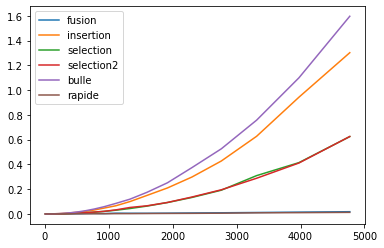

In [37]:
import matplotlib.pyplot as plt
from time import perf_counter
from numpy.random import choice

def liste(n):
    return list(choice(range(10*n), n))

def temps(tri, n):
    p = liste(n)
    debut = perf_counter()
    tri(p)
    return perf_counter() - debut

def liste_temps(tri, maxi = 5000):
    n = 10
    xs, ts = [], []
    while n < maxi:
        t = temps(tri, n)
        ts.append(t)
        xs.append(n)
        n = int(n*1.2)
    return xs, ts


x, y = liste_temps(tri_fusion)
plt.plot(x, y, label="fusion")
x, y = liste_temps(tri_insere)
plt.plot(x, y, label="insertion")
x, y = liste_temps(tri_selec)
plt.plot(x, y, label="selection")
x, y = liste_temps(tri_selec2)
plt.plot(x, y, label="selection2")
x, y = liste_temps(tri_bulle)
plt.plot(x, y, label="bulle")
x, y = liste_temps(tri_rap)
plt.plot(x, y, label="rapide")
plt.legend()
plt.show()

In [25]:
x, y = liste_temps(tri_fusion, 20000)
plt.plot(x, y, label="fusion")
x, y = liste_temps(tri_rap, 20000)
plt.plot(x, y, label="rapide")
plt.legend()
plt.show()

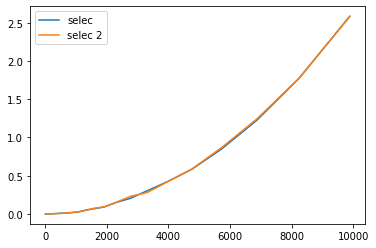

In [39]:
x, y = liste_temps(tri_selec,10000)
plt.plot(x, y, label="selec")
x, y = liste_temps(tri_selec2,10000)
plt.plot(x, y, label="selec 2")
plt.legend()
plt.show()